# **Bivariate Linear Regression Implementation with Mini-Batch Gradient Descent from Scratch**
*By Carlos Santiago Bañón*

* **Year:** 2020
* **Technologies:** Python, NumPy, Matplotlib
* **Areas(s):** Machine Learning, Regression
* **Keywords:** `gradient-descent`, `linear-regression`, `machine-learning`, `mini-batch-gradient-descent`, `regression`
* **Description:** This notebook presents an implementation of bivariate linear regression with mini-batch gradient descent from scratch.

## 1. Import Statements

---



In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Random Data Generation

---



The following is a sample data function $f$ that will be used for the purposes of this implementation.
</br>
</br>
Here, $f(x_1, x_2) = 3x_1 + 4x_2 + 5$.

In [2]:
def f(x1, x2):
  return (3 * x1) + (4 * x2) + 5

Further, the following code randomly generates values for $x_1$, $x_2$, and $y$, and plots the data for better visualization.

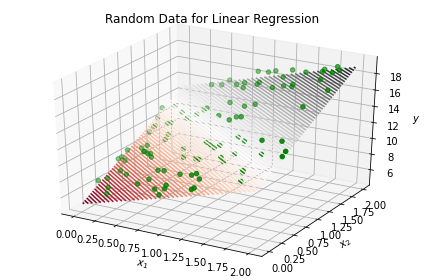

In [3]:
# Random Data Generation
m = 100
x1 = 2 * np.random.rand(m, 1)
x2 = 2 * np.random.rand(m, 1)
y = f(x1, x2) + np.random.rand(m, 1)

# Random Data Plot
x1_raw = np.linspace(0, 2, 50)
x2_raw = np.linspace(0, 2, 50)
X1, X2 = np.meshgrid(x1_raw, x2_raw)
Y = f(X1, X2)
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title('Random Data for Linear Regression')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.contour3D(X1, X2, Y, 100, cmap='RdGy')
ax.scatter3D(x1, x2, y, color='green')
plt.tight_layout()

## 3. Mini-Batch Gradient Descent Algorithm

---



The following code contains the main algorithm for **Mini-Batch Gradient Descent**.

In [4]:
# Mini-Batch Gradient Descent Algorithm

def mini_batch_gradient_descent(m, x1, x2, y):

  # Combine bias and weight.
  X_b = np.column_stack([np.ones(shape=(m, 1)), x1, x2])

  # Hyperparameters
  num_epochs = 20                        
  learning_rate = 0.01
  batch_size = 4
  initial_weight = np.random.randn(3, 1)

  # Initialize parameters for Mini-Batch Gradient Descent.
  weight = initial_weight
  weight_path = []
  weight_path.append(weight)

  for epoch in range(num_epochs):

    # Shuffle the data.
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    # Partition the data into m mini-batches.
    for i in range(0, m, batch_size):
      
      xi = X_b_shuffled[i:i+batch_size]
      yi = y_shuffled[i:i+batch_size]

      # Compute the gradients.
      gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
      weight = weight - learning_rate * gradient
      weight_path.append(weight)

  return weight_path

## 4. Linear Regression

---



Finally, the following code shows the final weights upon successful completion of the mini-batch gradient descent algorithm, as well as a visualization of the prediction model.

In [5]:
# Show the final weights.
weight_path = mini_batch_gradient_descent(m, x1, x2, y)
print(weight_path[-1])

[[4.78648423]
 [3.38038592]
 [4.28170148]]


In [6]:
def prediction_model(x, y):
  """
  Compute the value of y_hat for the prediction model.

  :x: the features.
  :y: the lables.
  """
  
  return weight_path[-1][2] + (x * weight_path[-1][1]) + (y * weight_path[-1][0])

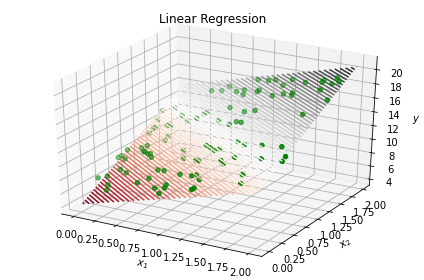

In [7]:
# Plot the prediction model.
X1, X2 = np.meshgrid(np.array([0, 2]), np.array([0, 2]))
y_hat = prediction_model(X1, X2)
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title('Linear Regression')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.contour3D(X1, X2, y_hat, 100, cmap='RdGy')
ax.scatter3D(x1, x2, y, color='green')
plt.tight_layout()